## FCN - Simulate the `Detection Layer` Process 

We generate the inputs to `DetectTargetLayer` , to manipulate and modify the layer to procduce a modified `output_rois` 
containing false positives. 
This will be passed on the the heatmap layer, and through there will become the input to FCN.

#### setup MRCNN and FCN models and load weights

In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
sys.path.append('../..')
from mrcnn.prep_notebook import (build_inference_pipeline, build_trainfcn_pipeline, prep_coco_dataset, 
                                run_training_pipeline, run_inference_pipeline)
from mrcnn.prep_notebook import get_training_batch, display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch
 
import numpy as np
import mrcnn.visualize as visualize
import mrcnn.utils     as utils
# from mrcnn.visualize import (plot_3d_heatmap, plot_2d_heatmap, plot_2d_heatmap_compare, plot_3d_heatmap_compare,
#                             display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, display_heatmaps_mrcnn_fcn)
                             
# import matplotlib as plt
%matplotlib inline
WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5'
mrcnn_model, fcn_model = build_inference_pipeline(fcn_weight_file = WEIGHT_FILE, batch_size = 2)
# mrcnn_model, fcn_model = build_trainfcn_pipeline(fcn_weight_file = WEIGHT_FILE, batch_size = 2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

--> Execution started at: 11-19-2018 @ 17:12:06
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 
--batch_size 2 --mrcnn_logs_dir train_mrcnn_coco --fcn_logs_dir   train_fcn8_coco_adam --mrcnn_model    last --fcn_model      last --fcn_arch       fcn8 --fcn_layers     all --sysout        screen 
    MRCNN Model        :  last
    FCN Model          :  last
    MRCNN Log Dir      :  train_mrcnn_coco
    FCN Log Dir        :  train_fcn8_coco_adam
    FCN Arch           :  FCN8
    FCN Log Dir        :  ['all']
    sysout             :  SCREEN
>>> Initialize Paths
 windows  Windows

Paths:
-------------------------
COCO_DATASET_PATH              F:\MLDatasets\coco2014
COCO_HEATMAP_PATH              F:\MLDatasets\coco2014_heatmaps
COCO_MODEL_PATH                F:\PretrainedModels\mask_rcnn_coco.h5
DIR_DATASET                    F:\MLDatasets
DIR_PRETRAINED                 F:\PretrainedModels
DIR_R

   FCN Block 53 shape is               :  (None, 16, 16, 512)
   FCN Block 54 (Max pooling) shape is :  (None, 8, 8, 512)

   --- FCN32 ----------------------------
   FCN fully connected 1 (fc1) shape   :  (None, 8, 8, 4096)
   FCN fully connected 2 (fc2) shape   :  (None, 8, 8, 4096)
   FCN conv2d (fcn32_deconv2D) shape   :  (?, 8, 8, 81)  keras_tensor  True

   --- FCN16 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)) shape is                   :  (None, 16, 16, 81)    keras_tensor  True
   FCN 2x Upsampling (Deconvolution2D(fcn32_classify)) shape :  (None, 18, 18, 81)    keras_tensor  True
   FCN 2x Upsampling/Cropped (Cropped2D(score2)) shape       :  (None, 16, 16, 81)    keras_tensor  True
   FCN Add Score2,scorePool4 Add(score2_c, scorePool4) shape :  (None, 16, 16, 81)    keras_tensor  True
   FCN upscore_pool4 (Deconv(fuse_Pool4)) shape              :  (None, 32, 32, 81)    keras_tensor  True

   --- FCN8 ----------------------------
   FCN scorePool4 (Conv2D(P

####  Load dataset

In [2]:
### Load dataset

dataset_test, test_generator = prep_coco_dataset(['train','val35k'], mrcnn_model.config, generator = True)
coco_class_names = dataset_test.class_names
####  Display number of loaded images and class names
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.



--> Execution started at: 11-19-2018 @ 16:15:32
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 
--batch_size 2 --mrcnn_logs_dir train_mrcnn_coco --fcn_logs_dir   train_fcn8_coco_adam --mrcnn_model    last --fcn_model      last --fcn_arch       fcn8 --fcn_layers     all --sysout        screen 
    MRCNN Model        :  last
    FCN Model          :  last
    MRCNN Log Dir      :  train_mrcnn_coco
    FCN Log Dir        :  train_fcn8_coco_adam
    FCN Arch           :  FCN8
    FCN Log Dir        :  ['all']
    sysout             :  SCREEN
>>> Initialize Paths
 windows  Windows

Paths:
-------------------------
COCO_DATASET_PATH              F:\MLDatasets\coco2014
COCO_HEATMAP_PATH              F:\MLDatasets\coco2014_heatmaps
COCO_MODEL_PATH                F:\PretrainedModels\mask_rcnn_coco.h5
DIR_DATASET                    F:\MLDatasets
DIR_PRETRAINED                 F:\PretrainedModels
DIR_ROOT                       F:\
DIR_TRAINING                   F:\models
FCN_TRAINING_PATH

   FCN Block 32 shape is               :  (None, 64, 64, 256)
   FCN Block 33 shape is               :  (None, 64, 64, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 32, 32, 256)
   FCN Block 41 shape is               :  (None, 32, 32, 512)
   FCN Block 42 shape is               :  (None, 32, 32, 512)
   FCN Block 43 shape is               :  (None, 32, 32, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 16, 16, 512)
   FCN Block 51 shape is               :  (None, 16, 16, 512)
   FCN Block 52 shape is               :  (None, 16, 16, 512)
   FCN Block 53 shape is               :  (None, 16, 16, 512)
   FCN Block 54 (Max pooling) shape is :  (None, 8, 8, 512)

   --- FCN32 ----------------------------
   FCN fully connected 1 (fc1) shape   :  (None, 8, 8, 4096)
   FCN fully connected 2 (fc2) shape   :  (None, 8, 8, 4096)
   FCN conv2d (fcn32_deconv2D) shape   :  (?, 8, 8, 81)  keras_tensor  True

   --- FCN16 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)) shape is

Done (t=22.44s)
creating index...
index created!
 image dir            :  F:\MLDatasets\coco2014\train2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_train2014.json
 number of images     :  82081
 image_ids[:10]       :  [262145, 262146, 524291, 131074, 393221, 131075, 393223, 393224, 524297, 9]
 image_ids[1000:1010] :  [1451, 132523, 1453, 132527, 263599, 132529, 132528, 263603, 263604, 132533]
Kevin loading annotations file F:\MLDatasets\coco2014\annotations/instances_valminusminival2014.json  into memory...
Done (t=11.23s)
creating index...
index created!
 image dir            :  F:\MLDatasets\coco2014\val2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_valminusminival2014.json
 number of images     :  35185
 image_ids[:10]       :  [262148, 393225, 131089, 262161, 262162, 393243, 262175, 131108, 393254, 42]
 image_ids[1000:1010] :  [134290, 527506, 527504, 134288, 527510, 265372, 265374, 265378, 527529, 3244]
Testing Dataset Imag

## Display Images

### Get next image from generator and display 

 Image_id    :  88857  Reference:  http://cocodataset.org/#explore?id=22051 Coco Id: 22051
 Image meta [88857   425   640     3   172     0   852  1024     1     1]
 Class ids   :  (28,)    [ 1  1  1  1  1  1  1  1  1 33 33 33 33 33 33 33 33 33 33 33 33 39 39 39 39 39 39 39]
 Class Names :  ['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'sports ball', 'tennis racket', 'tennis racket', 'tennis racket', 'tennis racket', 'tennis racket', 'tennis racket', 'tennis racket']


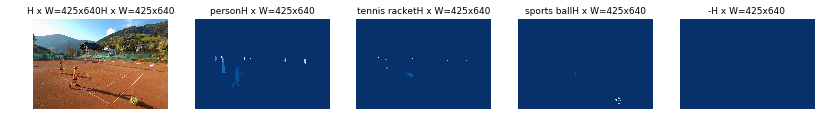

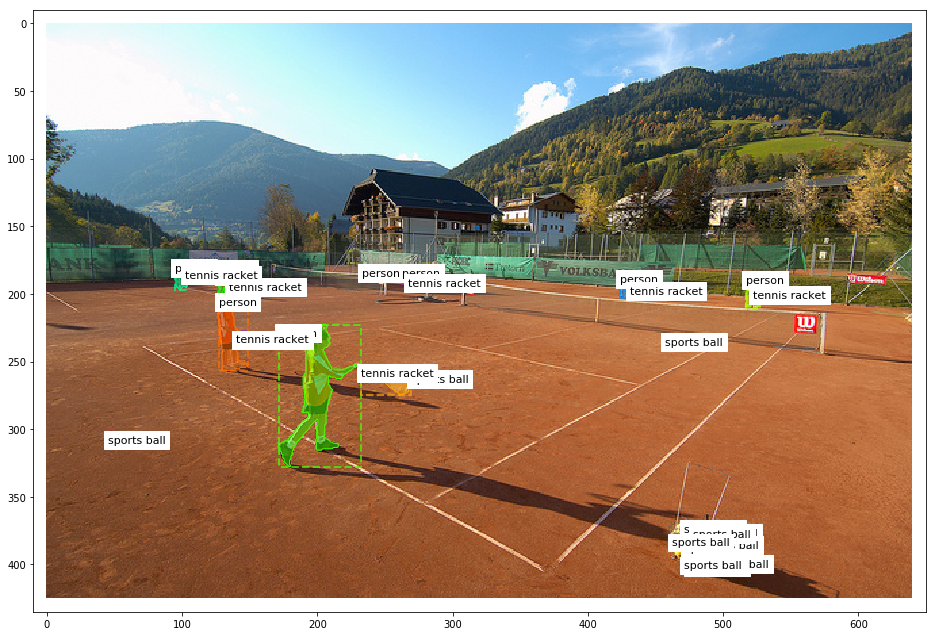

 Image_id    :  74451  Reference:  http://cocodataset.org/#explore?id=248831 Coco Id: 248831
 Image meta [74451   480   640     3   128     0   896  1024     1     1]
 Class ids   :  (3,)    [26  1 14]
 Class Names :  ['umbrella', 'person', 'bench']


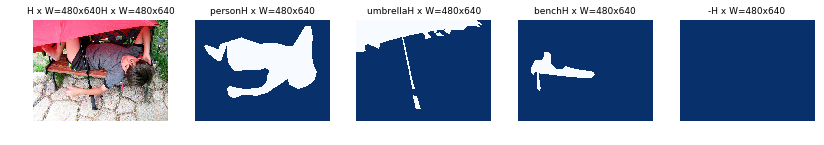

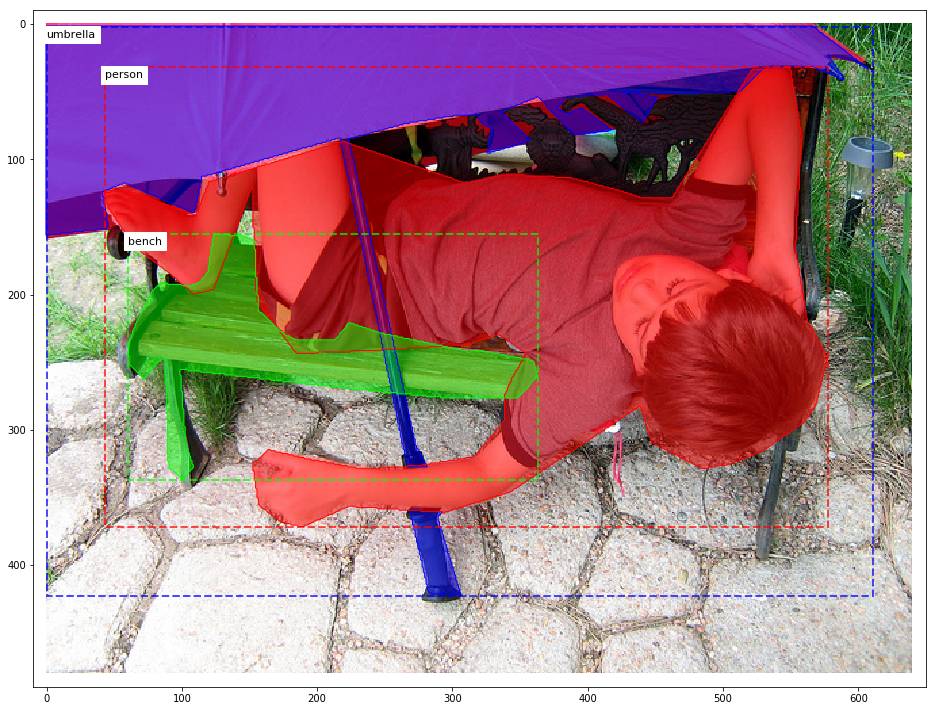

In [30]:
# test_batch_x, test_batch_y = next(test_generator)
display_training_batch(dataset_test, test_batch_x, masks = True)

### Get images using a list of image ids

In [ ]:
## 62642 (persons),   68539 (trucks) 36466 (surfers)  75040 (boat and persons)
## 36466 surfers. 5498 basketbal players, 27711,30531
## 5498 lots of motorcylces & persons - 
## Persons: #26026, #7719, 111864, 58240,  
## 35347 - laptops, keyboards and cat
## items = [59199 , 102868]
## 89243: Person, bicylce and traiffic lights
## 101623 (cake and forks), 41423 (elephant & people)
## 33477 Table, bowl, cup, sandwich, knife
## 26763 Table, chair, cup , bowl, bottle
## 49316 Table, book, backpack, many bottles
## 12902 Car , truck and traffic light tree
## 57327 person and horses
## 26026 -- mountain, skiers, skiboards 
##  7719 -- people, bottles, handbags
## 27711 -- persons and boats
## 18045 -- person     
## 36769 -- people in meeting room with a 'giraffe'detection?
##  8634 -- person
## 30531 -- tennis players 
##  8645 -- two people
## 24627 -- Pizza, bowl, cups
# IMAGE_LIST = [75040] 
# IMAGE_LIST = [89243]
# IMAGE_LIST = [33477]
# IMAGE_LIST = [29731]
# IMAGE_LIST = [26763]
# IMAGE_LIST = [89243]  ## 89243: Person, bicylce and traiffic lights
# IMAGE_LIST = [43168]   ## 43168 Multiple umbrella, chairs, beds

Loading 2 images
image                    shape: (425, 640, 3)         min:    0.00000  max:  255.00000
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000


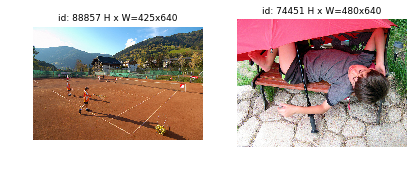

<class 'numpy.ndarray'>


In [16]:
# IMAGE_LIST = [18388, 64305] # , 1507]
# IMAGE_LIST = [107639, 112710, 39775]
# IMAGE_LIST = [24627, 33758, 6749]
# IMAGE_LIST = [24627, 33758] # , 6749]
# IMAGE_LIST = [92929, 49399]
IMAGE_LIST = [88857, 74451]
image_batch = get_image_batch(dataset_test,IMAGE_LIST, display=True)
# test_batch_x = get_training_batch(dataset_test, mrcnn_model.config, IMAGE_LIST)
# inference_batch, image_batch = get_inference_batch(dataset_test, mrcnn_model, IMAGE_LIST, display = True)
 

### Other display functions

#### Display top masks for sample images

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_test.image_ids, 7)
for image_id in image_ids:
    image = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)

####  Dispaly a random image from dataset_test

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
_ = batch_input = demo_image(dataset_test, mrcnn_model.config, image_id, masks = False)

#### Get an image and place into train_batch_x

In [ ]:
IMAGE_LIST= [30531]
batch_input = get_training_batch(dataset_test, mrcnn_model.config, 30531, masks = False)

## FCN detection using `fcn.detect()` - run `image_batch` Image List through model pipeline

In [ ]:
# print(fcn_scores[0,:10])
# print(detections[0,:10])
IMAGE_LIST = [18388, 64305] # , 1507]
# IMAGE_LIST = [107639, 112710, 39775]
# image_batch = get_image_batch(dataset_test, IMAGE_LIST, display = True)

In [17]:
fcn_results = fcn_model.detect(mrcnn_model, image_batch)

call mrcnn predict()
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (2, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (2, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (2, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (2, 89) <class 'numpy.ndarray'>


 Detections are:
[[ 536.      279.      690.      370.        1.        0.9957]
 [ 436.      945.      491.     1023.        5.        0.9916]
 [ 490.      201.      584.      235.        1.        0.9909]
 [ 463.      678.      499.      691.        1.        0.9834]
 [ 464.      828.      509.      845.        1.        0.9727]
 [ 450.      153.      486.      165.        1.        0.9599]
 [ 580.      376.      610.      435.       39.        0.9056]
 [ 461.      203.      490.      214.        1.        0.6807]
 [ 467.      392.      497.      401.        1.        0.6157]
 [ 770.      739.      790.      758.       33.        0.5586]
 [ 464.      674.  

In [26]:
np.set_printoptions(linewidth=180,precision=4,threshold=10000, suppress = True)
print(' Length of fcn_results: ', len(fcn_results))
r = fcn_results[0]
print(r.keys())
for i in r.keys():
    print('   {:.<25s}  {}'.format(i , r[i].shape))

 Length of fcn_results:  2
dict_keys(['fcn_hm', 'fcn_scores', 'fcn_scores_by_class', 'pr_scores', 'pr_hm', 'pr_scores_by_class', 'class_ids', 'rois', 'image_meta', 'image', 'mrcnn_scores', 'fcn_sm'])
   fcn_hm...................  (256, 256, 81)
   fcn_scores...............  (12, 13)
   fcn_scores_by_class......  (81, 100, 13)
   pr_scores................  (12, 11)
   pr_hm....................  (256, 256, 81)
   pr_scores_by_class.......  (81, 100, 11)
   class_ids................  (12,)
   rois.....................  (12, 4)
   image_meta...............  (89,)
   image....................  (425, 640, 3)
   mrcnn_scores.............  (12,)
   fcn_sm...................  (256, 256, 81)


In [27]:
print('image          : ', r["image"].shape )
print('image_meta     : ', r["image_meta"].shape, r["image_meta"][:11] )
# print('  rois           : ', r['rois'].shape)
# print(r['rois'])
print('class ids      : ', r['class_ids'].shape, r['class_ids'])
print('mrcnn_scores         : ', r['mrcnn_scores'].shape)
print(r['mrcnn_scores'])
# print('  pr_heatmap     : ', r['pr_hm'].shape)
# print('  fcn_hm         : ', r['fcn_hm'].shape)
# print('  fcn_sm         : ', r['fcn_sm'].shape)
print('pr_scores      : ', r['pr_scores'].shape)
print('pr_scores  : ')
print(r['pr_scores'])

print('fcn_scores:',r['fcn_scores'].shape)
print('fcn_scores  : ')
print(r['fcn_scores'])
# 
# print('  pr_scores_by_class:',r['pr_scores_by_class'].shape)
# print(r['pr_scores_by_class'][ r['class_ids'],:10])
# print('  fcn_scores_by_class:',r['fcn_scores_by_class'].shape)
# print(r['fcn_scores_by_class'][ r['class_ids'],:10])

image          :  (425, 640, 3)
image_meta     :  (89,) [   0  425  640    3  172    0  852 1024    0    0    0]
class ids      :  (12,) [ 1  5  1  1  1  1 39  1  1 33  1  1]
mrcnn_scores         :  (12,)
[0.9957 0.9916 0.9909 0.9834 0.9727 0.9599 0.9056 0.6807 0.6157 0.5586 0.5336 0.5156]
pr_scores      :  (12, 11)
pr_scores  : 
[[227.     174.     323.     231.       1.       0.9957 100.       1.       0.9989 875.875    0.9989]
 [165.     590.     199.     639.       5.       0.9916  99.       1.       0.9907 268.125    0.9907]
 [198.     125.     257.     146.       1.       0.9909  98.       0.9952   0.9672 199.75     0.9626]
 [181.     423.     204.     431.       1.       0.9834  97.       0.9876   0.7943  29.25     0.7845]
 [182.     517.     210.     528.       1.       0.9727  96.       0.9769   0.9086  47.8125   0.8876]
 [173.      95.     196.     103.       1.       0.9599  95.       0.9641   0.6694  27.       0.6454]
 [255.     235.     273.     271.      39.       0.9056 

##  FCN detection using `fcn.run_inference_pipeline()` - run `IMAGE_LIST` through detection pipeline

Loading 2 images
image                    shape: (398, 640, 3)         min:    0.00000  max:  255.00000
image                    shape: (428, 640, 3)         min:    0.00000  max:  255.00000


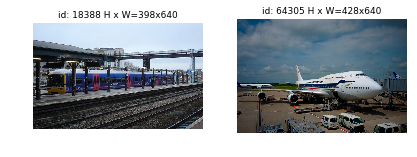

call mrcnn predict()
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (2, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (2, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (2, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (2, 89) <class 'numpy.ndarray'>


 Detections are:
[[517.     705.     582.     730.       1.       0.992 ]
 [454.      12.     614.     926.       7.       0.9695]
 [460.      77.     621.     243.       6.       0.7139]
 [521.     699.     571.     713.       1.       0.5538]
 [521.     723.     578.     738.       1.       0.5355]]


 Detections are:
[[ 436.       50.      686.      879.        5.        0.9997]
 [ 485.      936.      528.     1001.        5.        0.9936]
 [ 545.        0.      586.      220.        5.        0.9925]
 [ 742.      506.      838.      616.        8.        0.9227]
 [ 757.      284.      853.      554.        8.        0.9176]
 [ 652.      521.      716.  

In [81]:
# mrcnn_model.layer_info()
# fcn_model.layer_info()
# # IMAGE_LIST = [18388, 64305, 1507]
# # IMAGE_LIST = [24627, 33758] # , 6749]
IMAGE_LIST = [18388, 64305] #1507]
# IMAGE_LIST = [88857, 74451]
fcn_results = fcn_model.run_inference_pipeline(mrcnn_model, dataset_test, IMAGE_LIST, verbose = True)

## Visualize results from `fcn.run_inference_pipeline()`

[[  166.        31.       323.       549.         5.         0.9997   100.         1.         1.     12953.125      1.         1.9196     1.    ]
 [  197.       584.       224.       625.         5.         0.9936    99.         0.9939     0.9764   174.6875     0.9704     0.1518     0.0791]
 [  234.         0.       260.       137.         5.         0.9925    98.         0.9928     0.9843   563.75       0.9772     0.3614     0.1883]
 [  358.       316.       418.       384.         8.         0.9227    97.         1.         0.999    660.         0.999      1.5697     0.6398]
 [  367.       177.       427.       346.         8.         0.9176    96.         0.9945     0.9993  1620.         0.9938     2.4533     1.    ]
 [  301.       325.       341.       389.         8.         0.8985    95.         0.9737     0.9946   412.         0.9684     1.2513     0.51  ]
 [  316.       210.       356.       371.         8.         0.8895    94.         0.964      0.9959  1044.0625     0.9601  

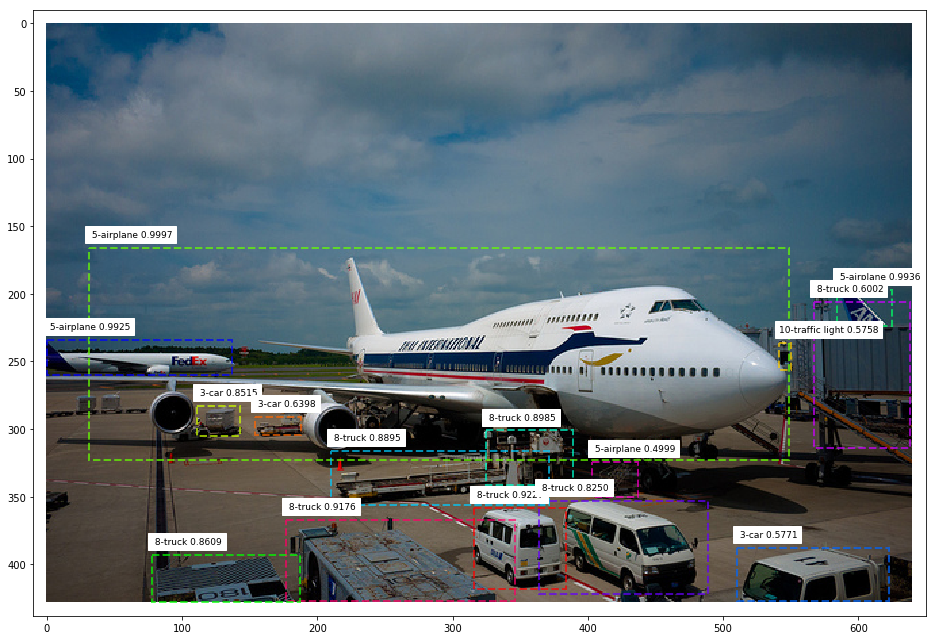

In [82]:
np.set_printoptions(linewidth=180,precision=4,threshold=10000, suppress = True)
for img_idx in [1]:
# img_idx = 0
    r = fcn_results[img_idx]
    print(r['fcn_scores'])
    visualize.display_instances_from_prscores(r['image'], r['fcn_scores'], coco_class_names, score_range=(0.0, 1.72))

 heatmap shape:  (256, 256, 81)
 Bounding boxes shape:  (81, 100, 13)
Image shape : (428, 640, 3)  class_ids: [ 3  5  8 10]
 SCALING == clip (clip to [-1, +1])


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


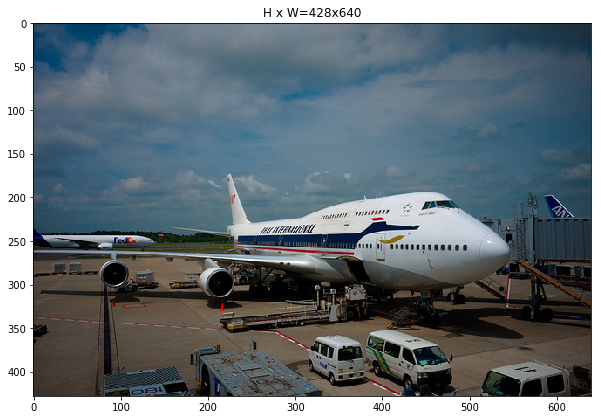

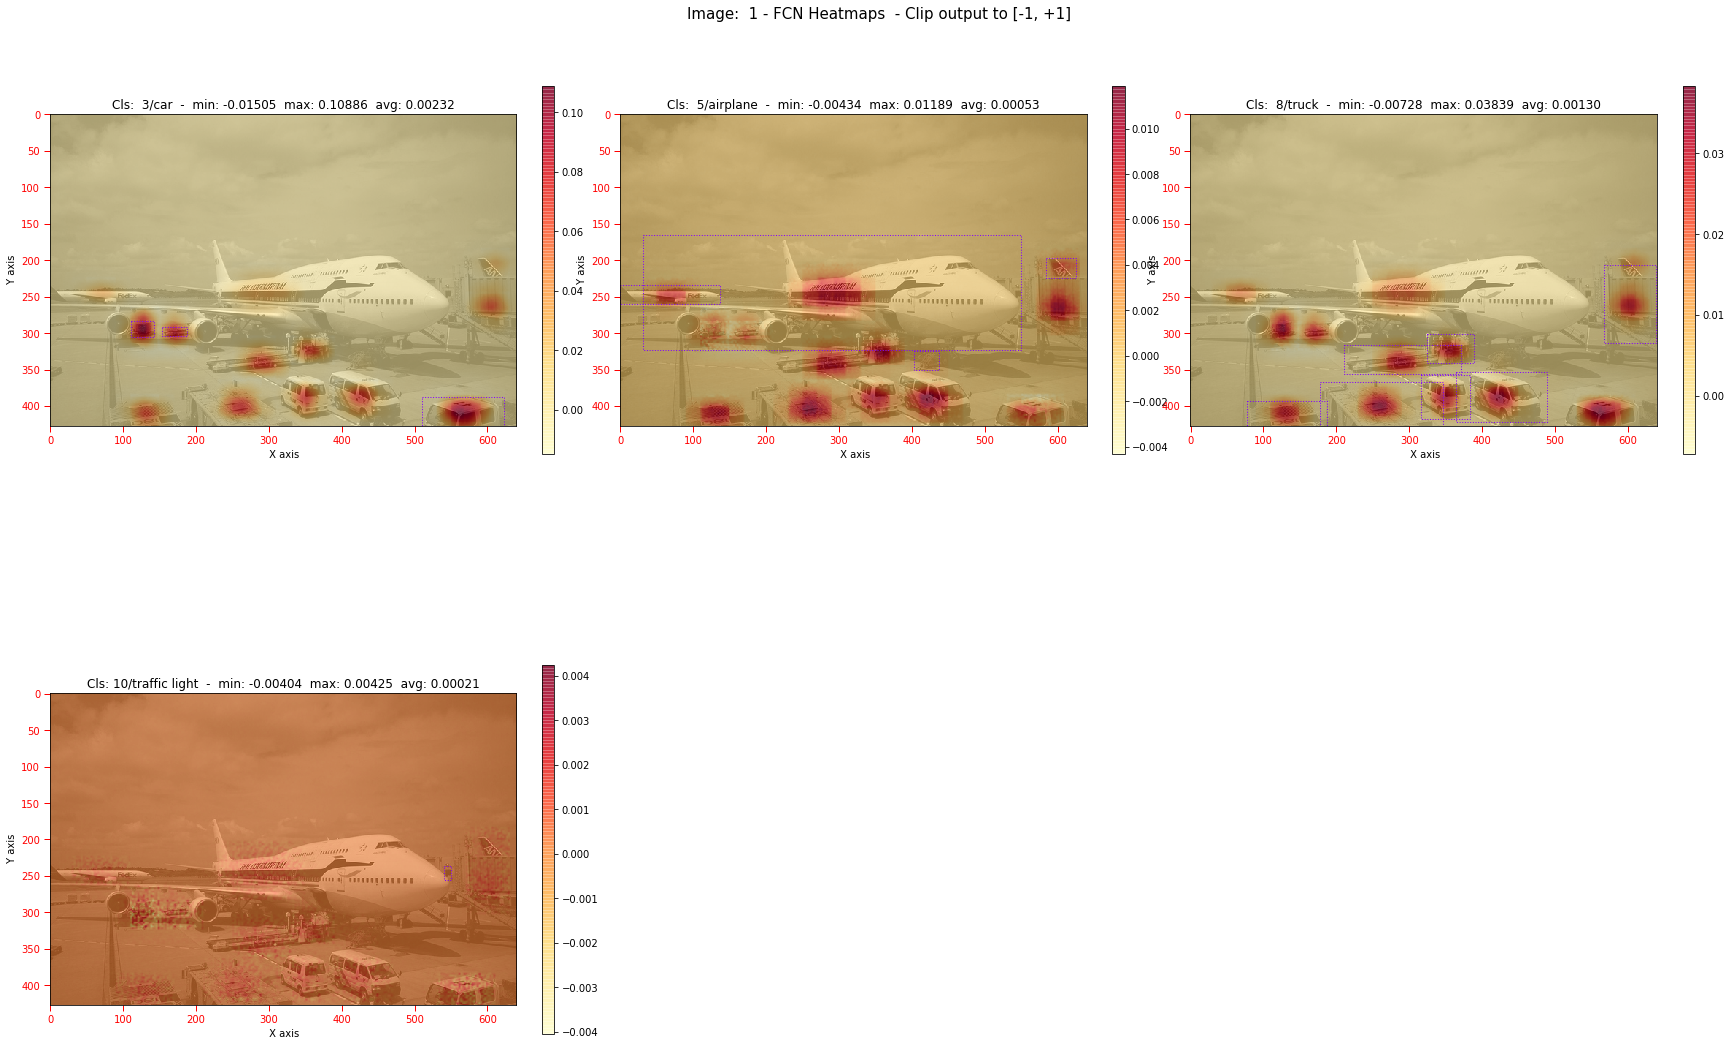

In [83]:
from mrcnn.visualize import inference_heatmaps_display
inference_heatmaps_display(fcn_results, img_idx, class_ids =None, class_names = coco_class_names,
                                                      hm = 'hm', config = mrcnn_model.config, scaling = 'clip')

### Compare mrcnn predcited and FCN generated heatmaps from inference process

 heatmap shape:  (256, 256, 81)
 Bounding boxes shape:  (81, 100, 13)
Image shape : (480, 640, 3)  class_ids: [ 1 26]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


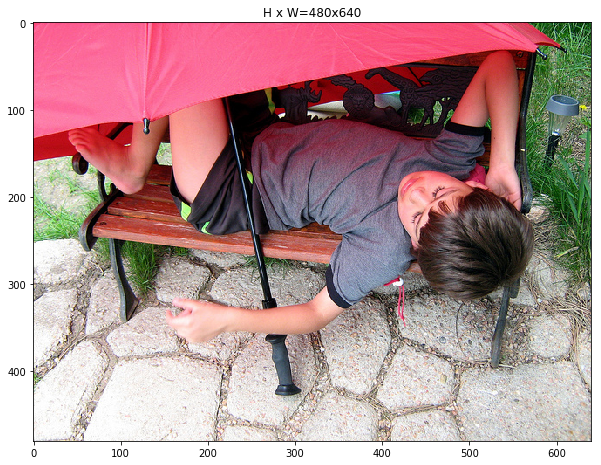

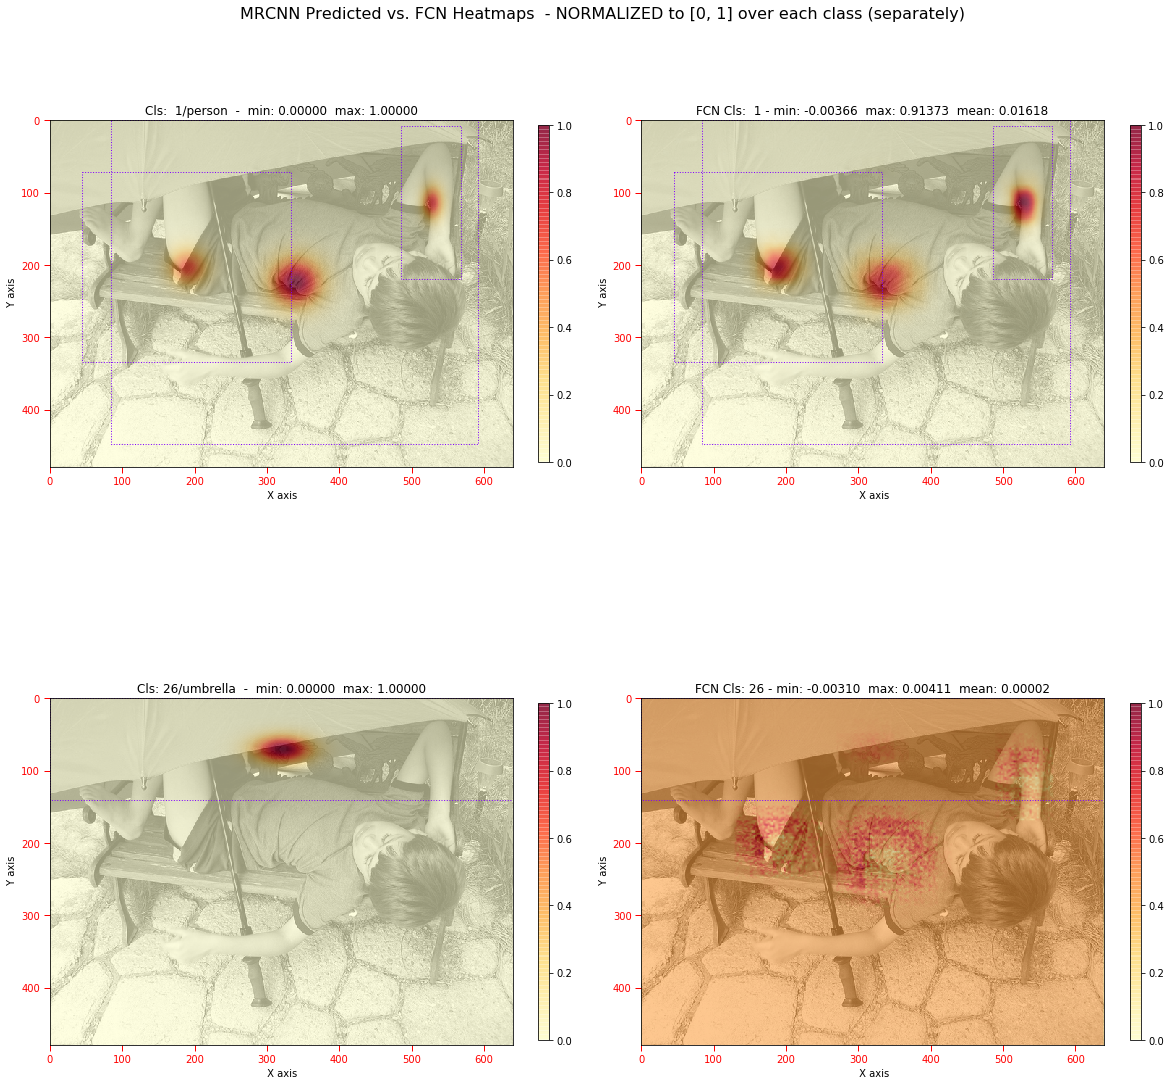

In [42]:
class_ids = np.arange(20)
visualize.inference_heatmaps_compare(fcn_results, img_idx, class_ids = None, class_names=coco_class_names,
                                     hm = 'hm', config = mrcnn_model.config, scaling = 'each')

 Image Id:  1  Display classes: [ 1 26]
 rows   1  columns : 3 boxes.shape :  (81, 100, 13)
 min_z_all shape: ()  min_z_all: -0.060993116  max_z_all: () max_z_all: 0.9137283
 min_z_cls shape: (1, 1, 81)  max_z_cls shape: (1, 1, 81)
 SCALING == none 


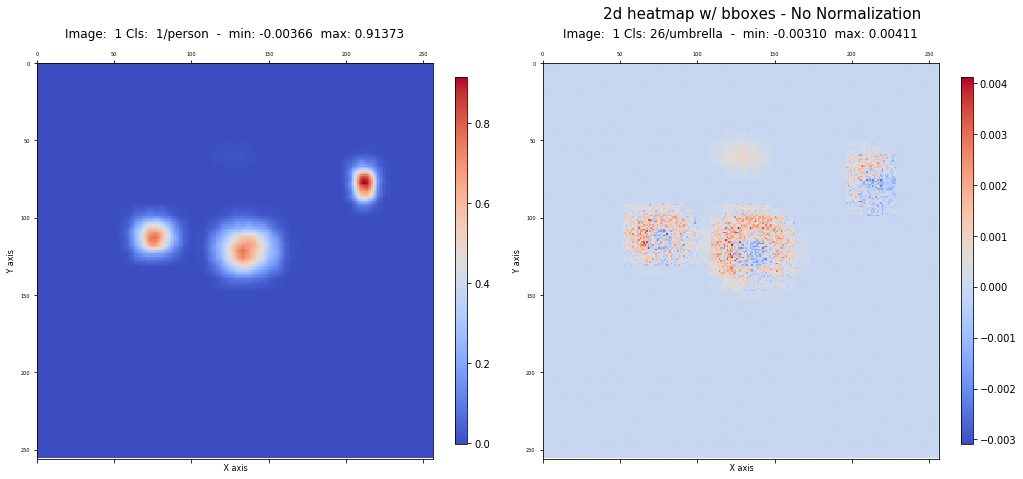

In [74]:
img_id = 1
r = fcn_results[img_id]
pr_class_ids = np.unique(r['class_ids'])
fig = visualize.plot_2d_heatmap(r['fcn_hm'], r['fcn_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = coco_class_names, scale = 4, scaling = 'none')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

3
Image : 1  Predicted    ClassIds: [0, 1, 26]
Display classes: [0, 1, 26]
 image height/width  256 256
shape pos  (256, 256, 2) shape Z1:  (256, 256, 81) shape Z2: (256, 256, 81)
 min_z1_all shape: ()  min_z1_all: 0.0  max_z1_all: () max_z1_all: 1.0
 min_z2_all shape: ()  min_z2_all: -0.060993116  max_z2_all: () max_z2_all: 0.9137283
ttl:  HM1 Img:  0 Cls:  0/BG  -  min: 0.00000  max: 0.00000
ttl:  HM2 Img:  0 Cls:  0/BG  -  min: -0.06099  max: 0.04964
ttl:  HM1 Img:  0 Cls:  1/person  -  min: 0.00000  max: 1.00000
ttl:  HM2 Img:  0 Cls:  1/person  -  min: -0.00366  max: 0.91373
ttl:  HM1 Img:  0 Cls: 26/umbrella  -  min: 0.00000  max: 1.00000
ttl:  HM2 Img:  0 Cls: 26/umbrella  -  min: -0.00310  max: 0.00411


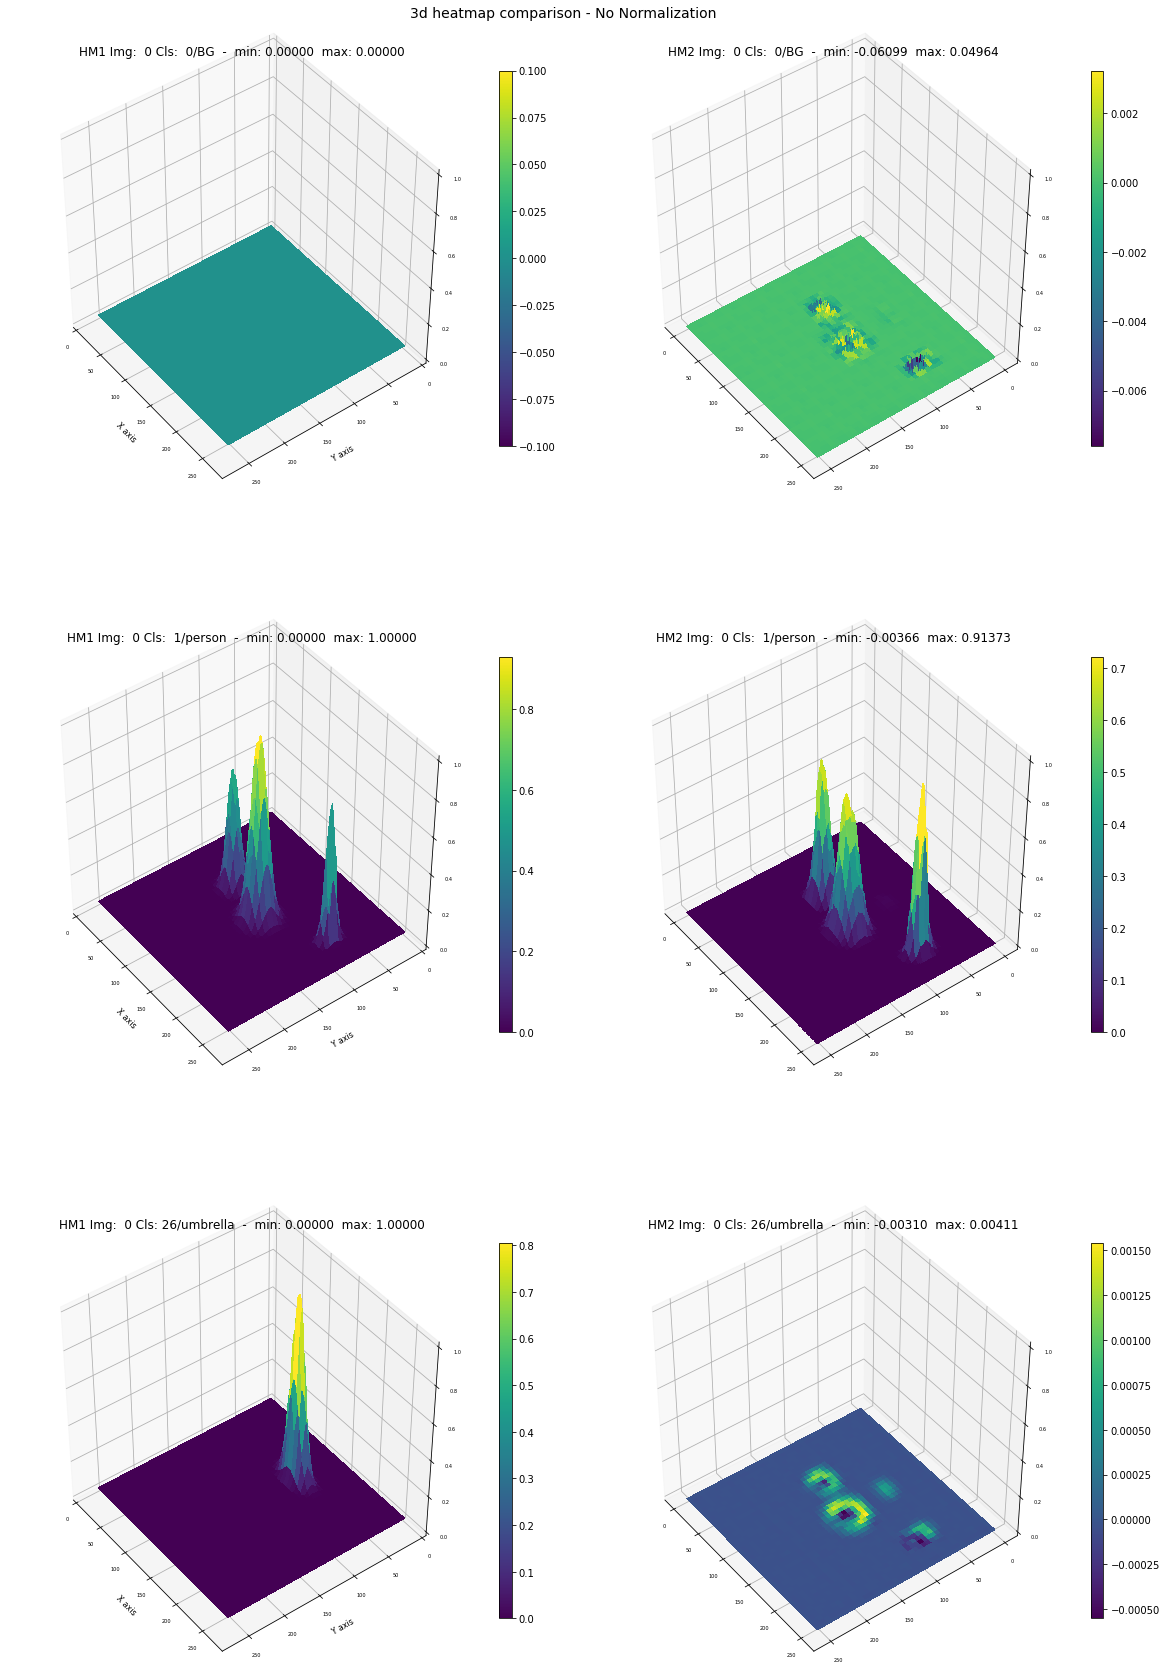

In [76]:
img_id = 1
r = fcn_results[img_id]
print(r['pr_scores_by_class'].ndim)
# print('Image id: ',image_id, ' Coco ID: ', dataset_train.image_info[image_id]['id'])
pr_class_ids = np.unique(r['pr_scores_by_class'][:,:,4]).astype(int).tolist()
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

visualize.plot_3d_heatmap_compare(r['pr_hm'], r['fcn_hm'], 0, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'none')    

## Run `inference_batch` through models using callback `prep_notebooks.run_inference_pipeline()`

### Run Image List through pipeline `run_inference_pipeline()`

In [ ]:
# mrcnn_model.layer_info()
# fcn_model.layer_info()
# # IMAGE_LIST = [18388, 64305, 1507]
# # IMAGE_LIST = [24627, 33758] # , 6749]
# IMAGE_LIST = [18388, 64305] #1507]
# fcn_outputs = run_inference_pipeline(mrcnn_model, fcn_model, dataset_test, IMAGE_LIST, verbose = True)

###  display info from `fcn_outputs`

In [32]:
float_formatter = lambda x: "%10.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=150, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)   


In [25]:
# results = mrcnn_model.detect([image], verbose=1)
r = fcn_outputs[0]
print('  Length of outputs:', len(r))
for i in r.keys():
    print( '   {:.<25s} {}'.format(i, str(r[i].shape)))
 

  Length of outputs: 12
   image.................... (427, 640, 3)
   fcn_scores............... (9, 13)
   pr_hm.................... (256, 256, 81)
   pr_scores_by_class....... (81, 100, 11)
   pr_scores................ (9, 11)
   fcn_hm................... (256, 256, 81)
   class_ids................ (9,)
   rois..................... (9, 4)
   mrcnn_scores............. (9,)
   fcn_sm................... (256, 256, 81)
   image_meta............... (89,)
   fcn_scores_by_class...... (81, 100, 13)


(4, 4)
[26  1  1  1]
['umbrella', 'person', 'person', 'person']


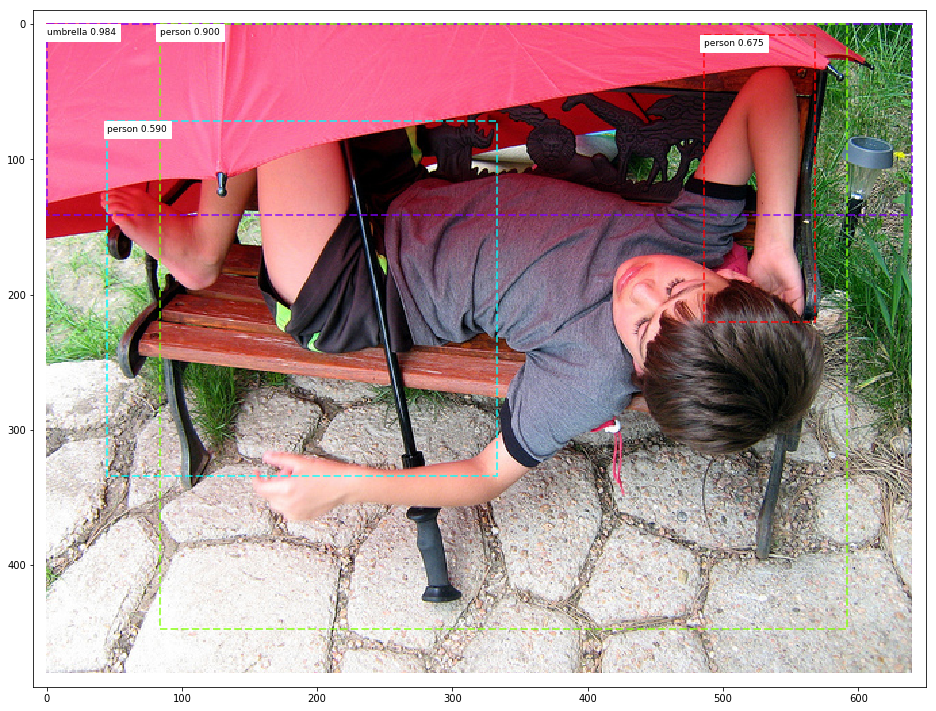

In [72]:
# bbox_ixs = np.arange(20,26)
print(r['rois'].shape)
print(r['class_ids'])
print([str(dataset_test.class_names[class_id]) for class_id in r['class_ids']])
visualize.display_instances(r['image'], r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,5])

### Display output from model

#### Display input_data

In [ ]:
# del input_image, input_image_meta, input_gt_class_ids, input_gt_bboxes #, input_gt_bboxes_norm
input_image      =  test_batch_x[0]
input_image_meta =  test_batch_x[1]

print(input_image.shape)
h, w = input_image.shape[1], input_image.shape[2]      #  tf.shape(input_image)[1], tf.shape(input_image)[2]
print('height/width', h,w)
print(' Input image shape is    :', input_image.shape)
print(' input_image_meta        :', input_image_meta)

# input_gt_bboxes_norm = input_gt_bboxes / [h,w,h,w]
# input_normlzd_gt_bboxes = tf.identity(input_gt_bboxes / [h,w,h,w])

#### Display Output Data

In [ ]:
print(len(model_output))
# del mrcnn_detection, rpn_roi_proposals, mrcnn_class, mrcnn_bbox
mrcnn_detection           = model_output[0]          # layer:  0   shape: (1, 100, 6)
rpn_roi_proposals         = model_output[1]          # layer:  1   shape: (1, 1000, 4)
mrcnn_class               = model_output[2]          # layer:  2   shape: (1, 1000, 81)
mrcnn_bbox                = model_output[3]          # layer:  3   shape: (1, 1000, 81, 4)
# pred_heatmap_norm         = model_output[4]          # layer:  4   shape: (1, 256, 256, 81)
# pred_heatmap_scores       = model_output[5]          # layer:  5   shape: (1, 81, 100, 11)
# print(type(model_output[4]))
# print(type(output_rois))
for i in model_output:
    print( i.shape)